# Global Power Plant Database Project

# Problem Statment

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

# Importing neccesary libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as stat
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Importing The Dataset

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory data analysis

In [4]:
#cheking dimention of dataset
df.shape

(907, 27)

so the dataset contain 907 rows and 27 coluomn

In [5]:
#cheking type of dataset
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [6]:
#to get good overviews of data set 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

From the above we can see the presence of null values

In [7]:
#checking number of unique values in dataset
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [8]:
#ckeking count
df["country"].value_counts()

IND    907
Name: country, dtype: int64

there is only 1 country in the dataset which we can drop.it will not affect our prediction.

In [9]:
df.drop(columns=['country','country_long'],axis=1,inplace=True)

In [10]:
#droping irrelavant columns
df.drop(columns=['other_fuel2','year_of_capacity_data','generation_data_source','other_fuel3','wepp_id','estimated_generation_gwh'],axis=1,inplace=True)

In [11]:
# cheking the count of name 
df['name'].value_counts()

YAMUNANAGAR TPP                      1
UPL Dharapuram Wind Farm             1
BHILAI TPP                           1
MUL GRETA                            1
Ravra - Welspun Solar Power Plant    1
                                    ..
PAITHON                              1
NEYVELI ST I                         1
KAYAM KULAM GT                       1
F_BAD CCGT                           1
KHOPOLI                              1
Name: name, Length: 907, dtype: int64

We can see name for each power plant is unique so we can drop it.

In [12]:
df.drop(columns=['name'],axis=1,inplace=True)

In [13]:
#cheking count of gppd-idnr columns
df['gppd_idnr'].value_counts()

IND0000055    1
IND0000469    1
IND0000311    1
WRI1019937    1
IND0000199    1
             ..
IND0000231    1
WRI1019986    1
IND0000297    1
WRI1019969    1
WRI1026165    1
Name: gppd_idnr, Length: 907, dtype: int64

This columns has unique ids for power plant 

In [14]:
df.drop('gppd_idnr',axis=1,inplace=True)

In [15]:
#column owner has 65% of null values and it is not relevant of given dataset so we will drop it
df.drop('owner',axis=1,inplace=True)

In [16]:
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
commissioning_year     380
source                   0
url                      0
geolocation_source      19
generation_gwh_2013    907
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
generation_gwh_2019    907
dtype: int64

<AxesSubplot:>

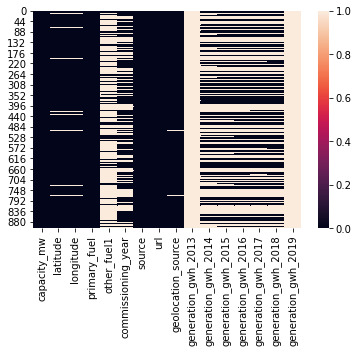

In [17]:
#Lets visualize null value clearly
sns.heatmap(df.isnull())

In [18]:
df.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2013         NaN
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
generation_gwh_2019         NaN
dtype: float64

# Treating null values Imputation Technique

In [19]:
#lets chek the mean of the lattitude
df['latitude'].mean()

21.19791811846691

In [20]:
# filling missing values in latitude using mean
df['latitude']=df['latitude'].fillna(df['latitude'].mean())

In [21]:
# let's check the mode of other_fuel1
df['other_fuel1'].mode()          # we can fill the null values using this code

0    Oil
dtype: object

In [22]:
df['other_fuel1'].mode()

0    Oil
dtype: object

In [23]:
# filling missing values in other_fuel1 using mode
df['other_fuel1']=df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])

In [24]:
df['geolocation_source'].mode()

0    WRI
dtype: object

In [25]:
# filling missing values in geolocation_source using mode
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [26]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'source', 'url', 'geolocation_source',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019'],
      dtype='object')

In [27]:
#other columns have numerical values and has skewness and lot of outliers so we will replace by median
#filling missing values using median values
df['longitude']=df['longitude'].fillna(df['longitude'].median())
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].median())
df['generation_gwh_2013']=df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].median())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].median())
df['generation_gwh_2019']=df['generation_gwh_2019'].fillna(df['generation_gwh_2019'].median())

In [28]:
df['generation_gwh_2013']=df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].mode())

In [29]:
df['generation_gwh_2013'].median

<bound method NDFrame._add_numeric_operations.<locals>.median of 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
902   NaN
903   NaN
904   NaN
905   NaN
906   NaN
Name: generation_gwh_2013, Length: 907, dtype: float64>

In [30]:
df['generation_gwh_2019']=df['generation_gwh_2019'].fillna(df['generation_gwh_2019'].mode())

In [31]:
df.isnull().sum()

capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
other_fuel1              0
commissioning_year       0
source                   0
url                      0
geolocation_source       0
generation_gwh_2013    907
generation_gwh_2014      0
generation_gwh_2015      0
generation_gwh_2016      0
generation_gwh_2017      0
generation_gwh_2018      0
generation_gwh_2019    907
dtype: int64

generation_gwh_2013,generation_gwh_2019 column have all Nan values so we will drop it  

In [32]:
df.drop(columns=['generation_gwh_2013','generation_gwh_2019'],axis=1,inplace=True)

In [33]:
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
other_fuel1            0
commissioning_year     0
source                 0
url                    0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

<AxesSubplot:>

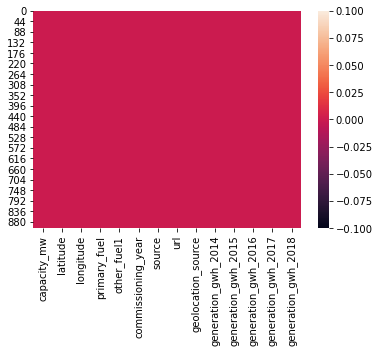

In [34]:
#Lets visualize null value clearly
sns.heatmap(df.isnull())

In [35]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'source', 'url', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

these are the columns present in the dataset now 

In [36]:
#cheking the list of counts of capacity_mw
df['capacity_mw'].value_counts()

5.0       39
10.0      22
15.0      20
600.0     20
1200.0    19
          ..
192.0      1
27.3       1
26.4       1
68.8       1
19.7       1
Name: capacity_mw, Length: 361, dtype: int64

In [37]:
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [38]:
df['other_fuel1'].value_counts()

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64

In [39]:
#checking the uniqueness of primary_fuel
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [40]:
#checking the uniqueness of primary_fuel
df['other_fuel1'].unique()

array(['Oil', 'Cogeneration', 'Gas'], dtype=object)

In [41]:
# cheking the list of counts of commisioning_year
df['commissioning_year'].value_counts()

2001.0    395
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1958.0      1
1949.0      1
1954.0      1
1956.0      1
1927.0      1
Name: commissioning_year, Length: 73, dtype: int64

In [42]:
#lets extract power plant age from commissioning year by substraction it from the year 2018
df['Power_plant_age']=2018 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

In [43]:
#lets check dataframe
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


#cheking weather the dataset contains any spaces
df.loc[df["capacity_mw"]==""]

It seems there is no spaces in dataset

# Description of Data set

In [44]:
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,19.271224
std,590.085456,6.079148,4.815073,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,17.072000,74.388900,801.123775,711.181225,737.205450,817.977250,751.644375,15.000000
50%,59.200000,21.281800,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375,17.000000
75%,385.250000,25.176450,79.206100,801.123775,711.181225,737.205450,817.977250,751.644375,20.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,91.000000


This gives statistical information of the dataset.There is no any negative or invalid values in dataset.
so from above we can conclude
There is no any null value since the count of all columns is same.



In [45]:
# cheking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['primary_fuel', 'other_fuel1', 'source', 'url', 'geolocation_source']


In [46]:
#cheking numerical values
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']


# Data Visualization

plotting catogerical column

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

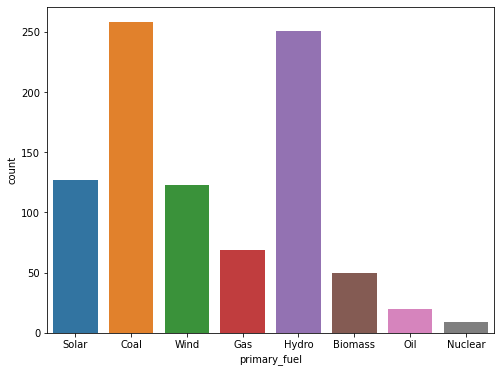

In [47]:
#Visualizing the primary_fuel
print(df['primary_fuel'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df['primary_fuel'])
plt.show

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

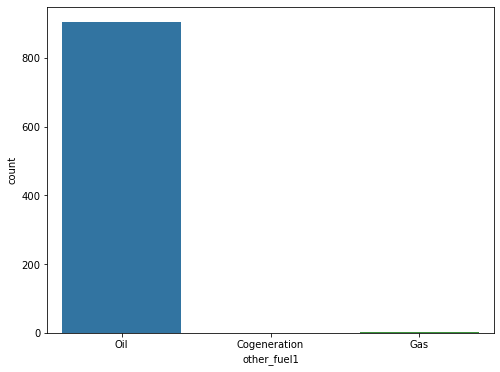

In [48]:
#Visualizing the other_fuel1
print(df['other_fuel1'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(df['other_fuel1'])
plt.show

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

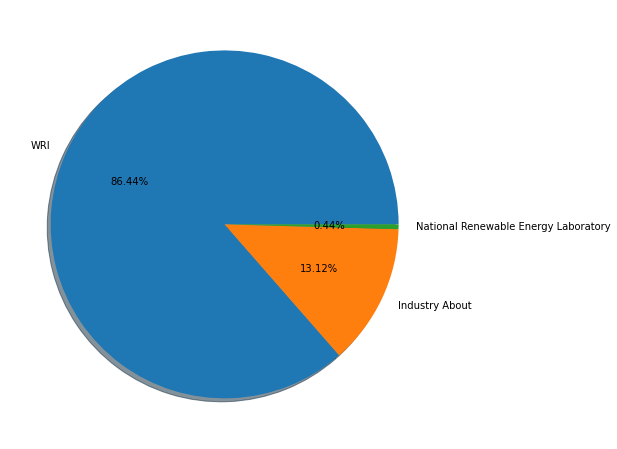

In [49]:
#visualizing the counts of owner
print(df['geolocation_source'].value_counts())
labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax= plt.subplots(figsize=(10,8))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show

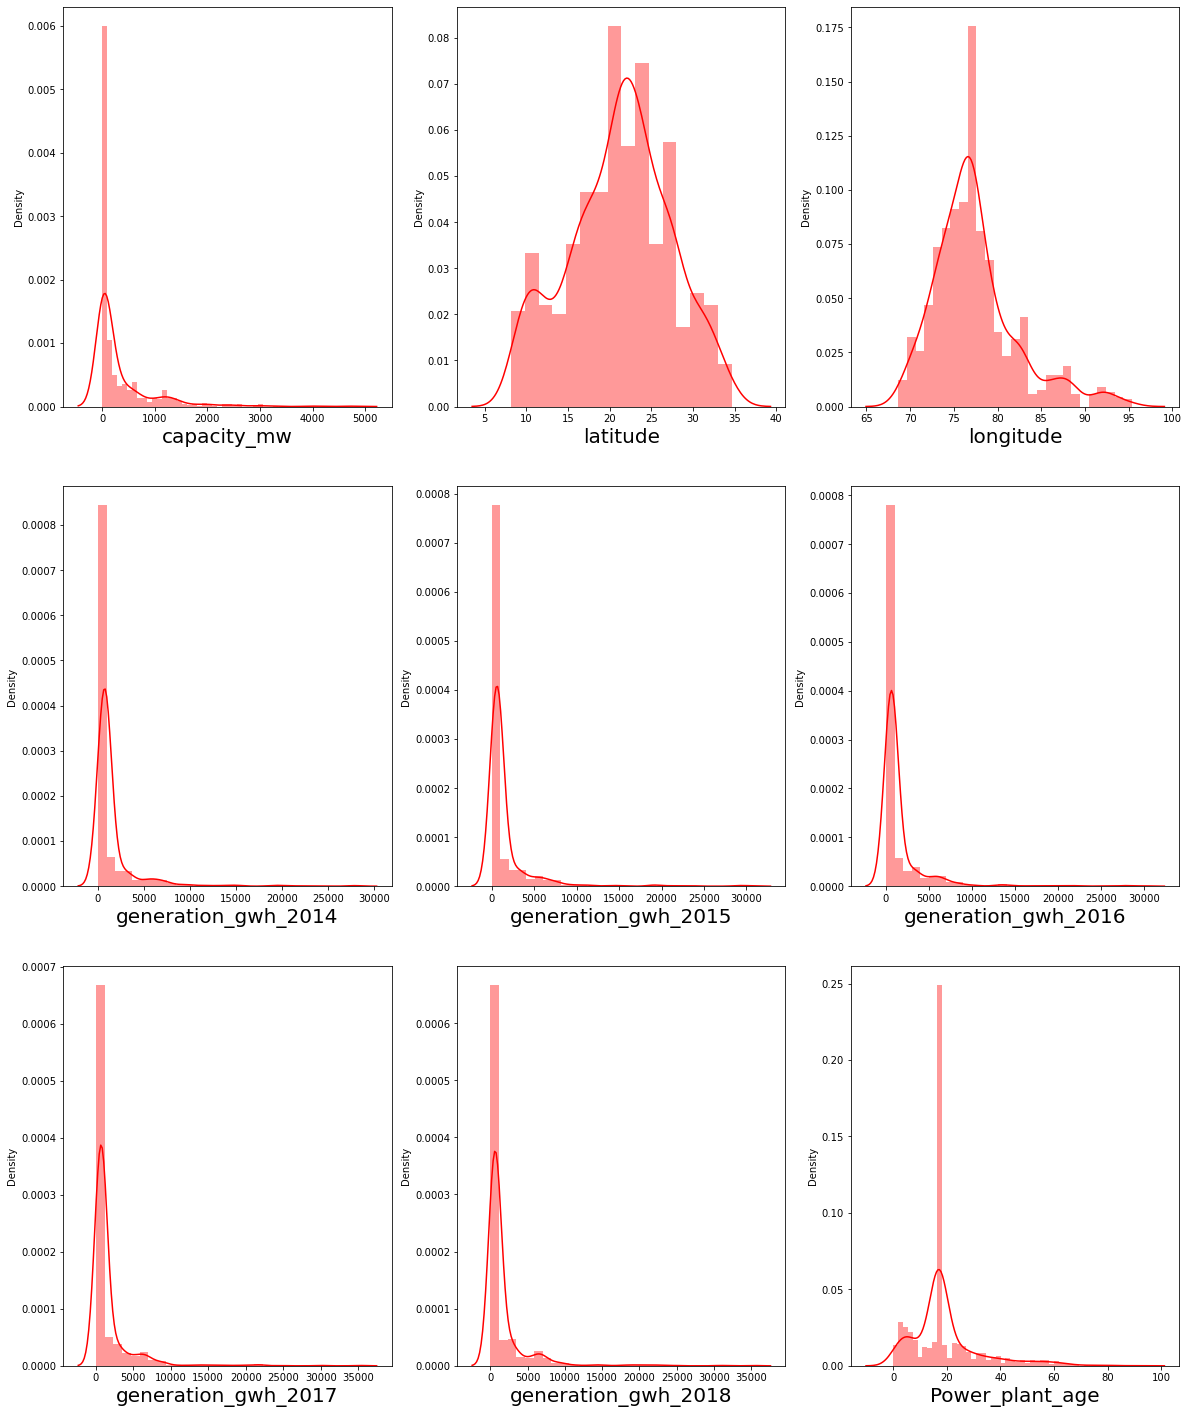

In [50]:
#how data is distributed to each colomn
plt.figure(figsize=(20,25), facecolor = 'white')
plotnumber = 1
for column in numerical_col:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color = 'r')
        plt.xlabel(column,fontsize = 20)
        plotnumber+=1
plt.show()

We can see that data is not distributed equally except lattitude column.


# Comparing target variable capacity_mw with features

<function matplotlib.pyplot.show(close=None, block=None)>

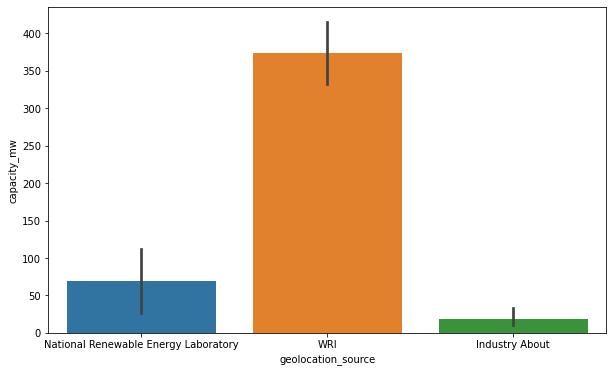

In [51]:
#lets chek the relation between source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x= 'geolocation_source', y = 'capacity_mw', data=df)
plt.show

Capacity of geolocation source WRI has maximum i.e above 350 mega watts.

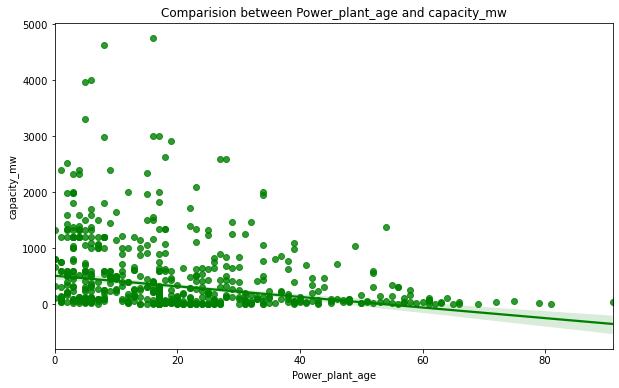

In [52]:
# Let's check how the Power_plant_age affects the capacity of the power plant
plt.figure(figsize=[10,6])
plt.title('Comparision between Power_plant_age and capacity_mw')
sns.regplot(df['Power_plant_age'],df['capacity_mw'],color = 'g');

<function matplotlib.pyplot.show(close=None, block=None)>

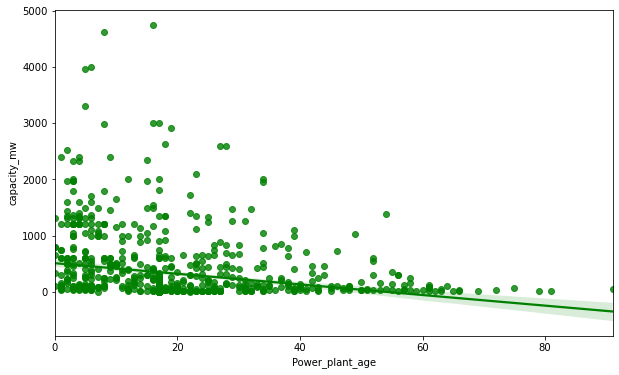

In [53]:
plt.figure(figsize = (10,6))
sns.regplot(df['Power_plant_age'], df['capacity_mw'],color= 'g')
plt.show

we can see that capacity of older power plant is lesser than power plant which started recentally.

<AxesSubplot:title={'center':'Comparison between latitude and capacity_mw'}, xlabel='latitude', ylabel='capacity_mw'>

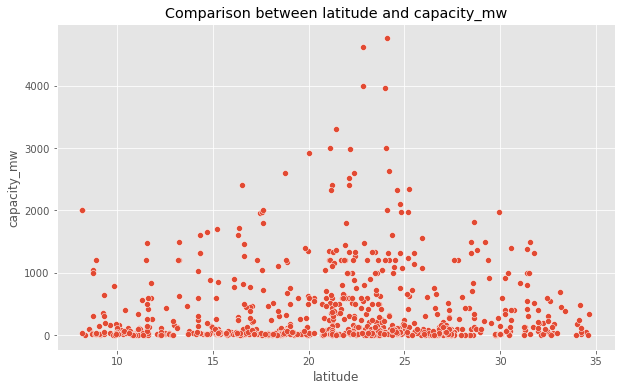

In [54]:
#lets check capacity is related to latitide of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparison between latitude and capacity_mw')
sns.scatterplot(df['latitude'],df['capacity_mw'])

<AxesSubplot:title={'center':'Comparison between longitude and capacity_mw'}, xlabel='longitude', ylabel='capacity_mw'>

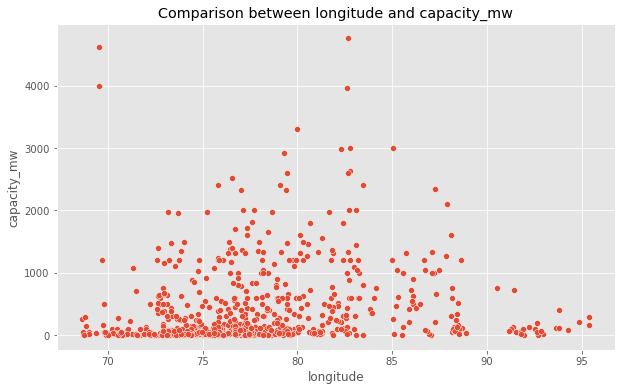

In [55]:
#lets check capacity is related to latitide of the power plant
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title('Comparison between longitude and capacity_mw')
sns.scatterplot(df['longitude'],df['capacity_mw'])

<function matplotlib.pyplot.show(close=None, block=None)>

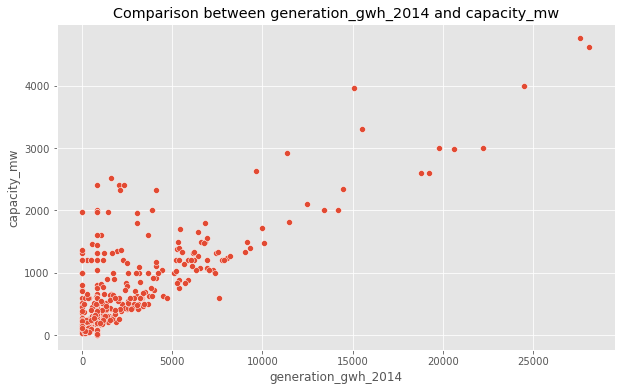

In [56]:
#lets chek the relation between source and capacity_mw
plt.figure(figsize = (10,6))
plt.title('Comparison between generation_gwh_2014 and capacity_mw')
sns.scatterplot(x= 'generation_gwh_2014', y = 'capacity_mw', data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

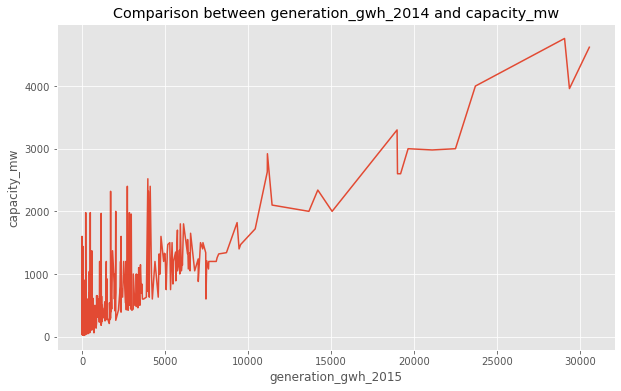

In [57]:
#lets chek the relation between source and capacity_mw
plt.figure(figsize = (10,6))
plt.title('Comparison between generation_gwh_2014 and capacity_mw')
sns.lineplot(x= 'generation_gwh_2015', y = 'capacity_mw', data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

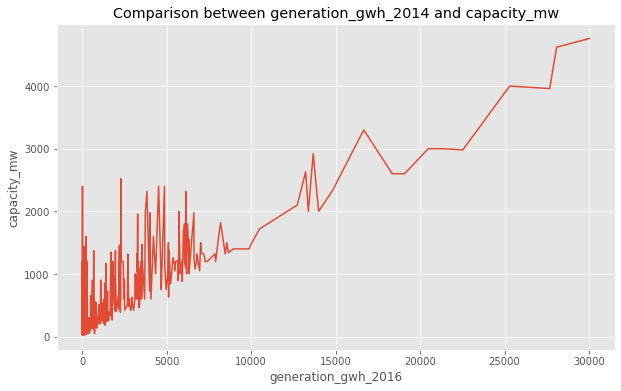

In [58]:
#lets chek the relation between source and capacity_mw
plt.figure(figsize = (10,6))
plt.title('Comparison between generation_gwh_2014 and capacity_mw')
sns.lineplot(x= 'generation_gwh_2016', y = 'capacity_mw', data=df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

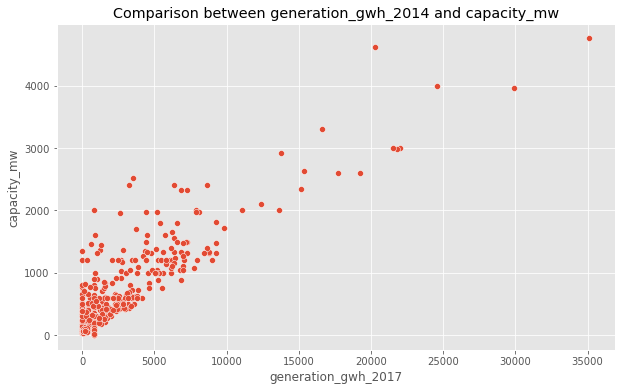

In [59]:
#lets chek the relation between source and capacity_mw
plt.figure(figsize = (10,6))
plt.title('Comparison between generation_gwh_2014 and capacity_mw')
sns.scatterplot(x= 'generation_gwh_2017', y = 'capacity_mw', data=df)
plt.show

there is postive relationship between year and capacity

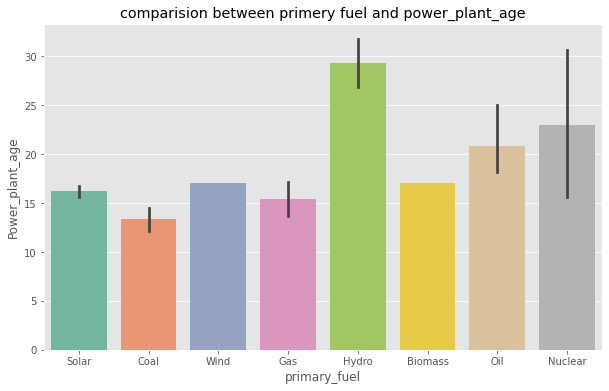

In [60]:
#Lets chek power plant age affects fuel type 
plt.figure(figsize=(10,6))
plt.title("comparision between primery fuel and power_plant_age")
sns.barplot(x='primary_fuel',y='Power_plant_age', data=df,palette='Set2')
plt.show()

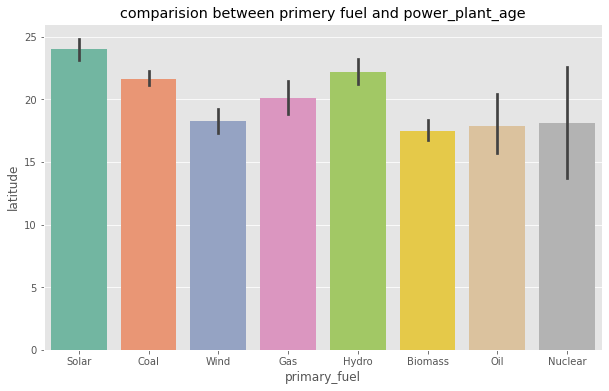

In [61]:
#Lets chek power plant age affects fuel type 
plt.figure(figsize=(10,6))
plt.title("comparision between primery fuel and power_plant_age")
sns.barplot(x='primary_fuel',y='latitude', data=df,palette='Set2')
plt.show()

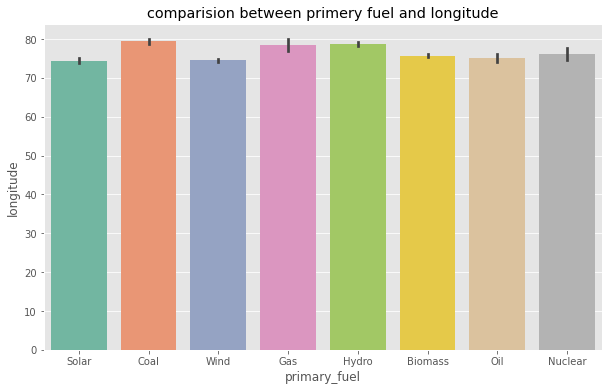

In [62]:
#Lets chek power plant age affects fuel type 
plt.figure(figsize=(10,6))
plt.title("comparision between primery fuel and longitude")
sns.barplot(x='primary_fuel',y='longitude', data=df,palette='Set2')
plt.show()

# checking reation between targets

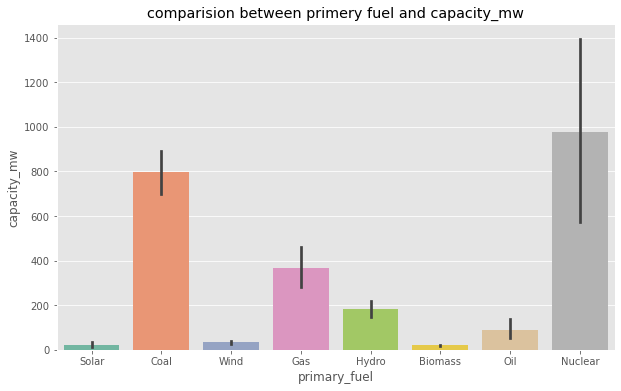

In [63]:
#Lets chek power plant age affects fuel type 
plt.figure(figsize=(10,6))
plt.title("comparision between primery fuel and capacity_mw")
sns.barplot(x='primary_fuel',y='capacity_mw', data=df,palette='Set2')
plt.show()

# Outlier Handelling

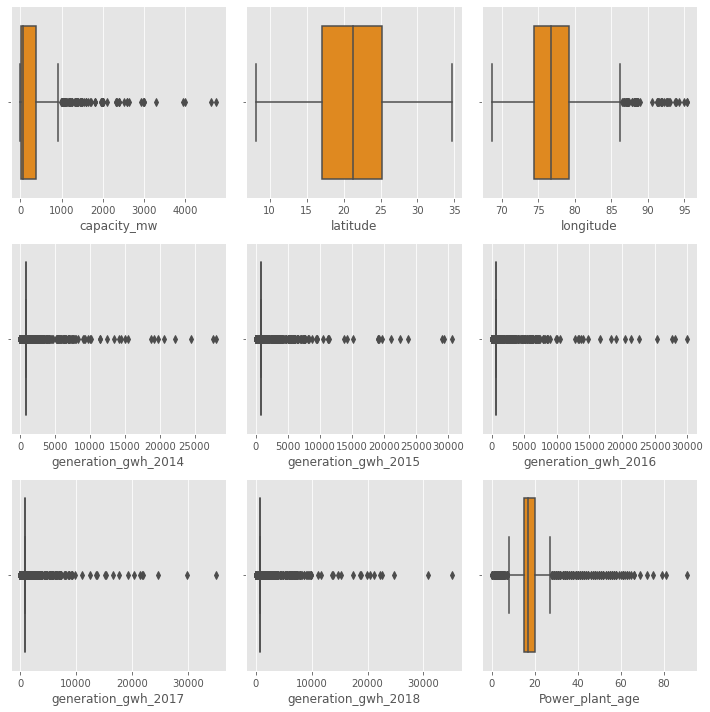

In [64]:
# identifying the outlierspresent in numerical columns using boxplot
plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color='darkorange')
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

in the boxplot we can see outliers.

# Removing Outliers

In [65]:
features = df[['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']]

In [66]:
# features containing outliers
features = df[['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']]

In [67]:
#using zscore to remove outliers
from scipy.stats import zscore
z = np.abs(zscore(features))

z

array([[0.86991672, 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.93307603],
       [0.58558978, 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.17269871],
       [1.67356683, 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.17269871],
       ...,
       [0.38359152, 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.17269871],
       [0.76456427, 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.17269871],
       [0.0103269 , 0.25702178, 0.26778301, ..., 0.27556459, 0.28839399,
        0.17269871]])

In [68]:
#creating new dataframe
new_df= df[(z<3).all(axis=1)]
new_df

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,url,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,Oil,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,24.7663,74.6090,Coal,Oil,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,21.9038,69.3732,Wind,Oil,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,23.8712,91.3602,Gas,Oil,Central Electricity Authority,http://www.cea.nic.in/,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,21.9603,82.4091,Coal,Oil,Central Electricity Authority,http://www.cea.nic.in/,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Oil,Central Electricity Authority,http://www.cea.nic.in/,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,2.0
903,3.0,12.8932,78.1654,Solar,Oil,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
904,25.5,15.2758,75.5811,Wind,Oil,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
905,80.0,24.3500,73.7477,Coal,Oil,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,17.0


In [69]:
df.shape

(907, 14)

In [70]:
new_df.shape

(851, 14)

In [71]:
#chaking data loss
Data_loss=(907-851)/907*100
Data_loss

6.174200661521499

So we will remove the outliers

there is no need of url column so we will remove it.

In [72]:
new_df.drop('url', axis=1,inplace=True)

# Encoding the categorical column

In [73]:
categorical_col = ['primary_fuel', 'other_fuel1', 'source', 'geolocation_source']

In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_df[categorical_col]=new_df[categorical_col].apply(le.fit_transform)

In [75]:
new_df[categorical_col]

,primary_fuel,other_fuel1,source,geolocation_source
0,6,2,109,1
1,1,2,174,2
2,7,2,21,2
3,2,2,22,2
4,1,2,22,2
...,...,...,...,...
902,1,2,22,2
903,6,2,77,0
904,7,2,21,2
905,1,2,59,2


Now we have encoded the categorical columns

In [76]:
#cheking corelation
cor = new_df.corr()
cor

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
capacity_mw,1.000000,0.050588,0.257582,-0.398039,-0.001758,-0.275724,0.234543,0.620202,0.680949,0.750088,0.788972,0.815198,-0.241487
latitude,0.050588,1.000000,-0.014145,-0.002561,0.037049,0.069430,-0.203340,0.081661,0.071346,0.057301,0.071296,0.064558,-0.097033
longitude,0.257582,-0.014145,1.000000,-0.382975,0.029191,-0.235719,0.263739,0.119473,0.154522,0.195299,0.196529,0.204421,-0.080034
primary_fuel,-0.398039,-0.002561,-0.382975,1.000000,0.006463,0.038558,-0.478601,-0.250101,-0.276308,-0.286624,-0.289232,-0.298364,0.074358
other_fuel1,-0.001758,0.037049,0.029191,0.006463,1.000000,0.028471,-0.022827,-0.000530,0.006092,0.015479,0.011842,0.022700,-0.058103
source,-0.275724,0.069430,-0.235719,0.038558,0.028471,1.000000,-0.497893,-0.141496,-0.156317,-0.158561,-0.156155,-0.165232,-0.075353
geolocation_source,0.234543,-0.203340,0.263739,-0.478601,-0.022827,-0.497893,1.000000,0.113446,0.125329,0.127128,0.125199,0.132477,0.051608
generation_gwh_2014,0.620202,0.081661,0.119473,-0.250101,-0.000530,-0.141496,0.113446,1.000000,0.912185,0.801237,0.746130,0.738063,-0.059768
generation_gwh_2015,0.680949,0.071346,0.154522,-0.276308,0.006092,-0.156317,0.125329,0.912185,1.000000,0.907984,0.830394,0.821726,-0.130252
generation_gwh_2016,0.750088,0.057301,0.195299,-0.286624,0.015479,-0.158561,0.127128,0.801237,0.907984,1.000000,0.932729,0.913720,-0.199087


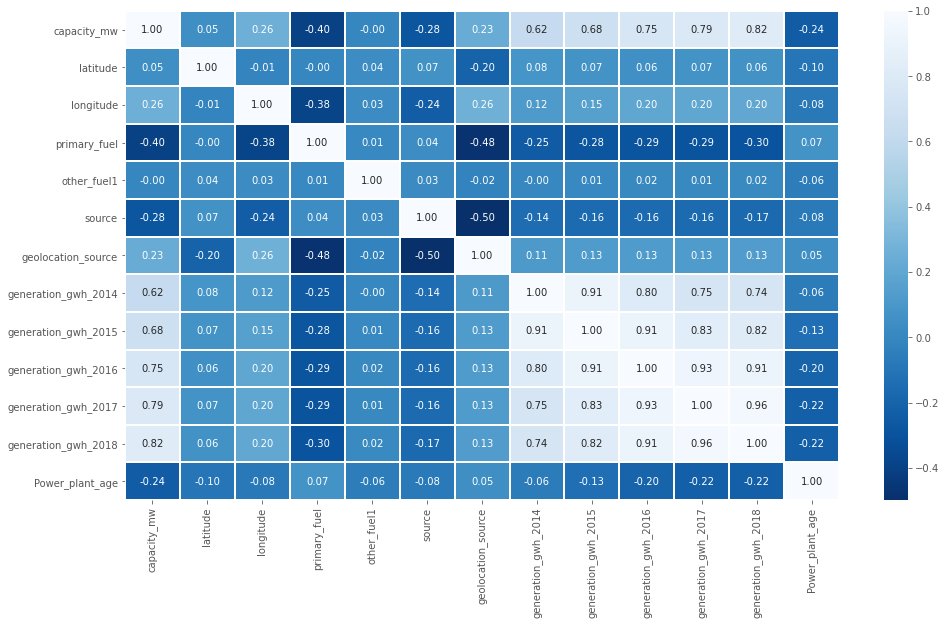

In [77]:
#visualizing correlation
plt.figure(figsize=(16,9))
sns.heatmap(new_df.corr(),linewidths =1 ,fmt ='0.2f',cmap="Blues_r", annot=True )
plt.yticks(rotation=0);

We can see the corelation between featurs to features and features to label

# Visualizing the correlation between label and features

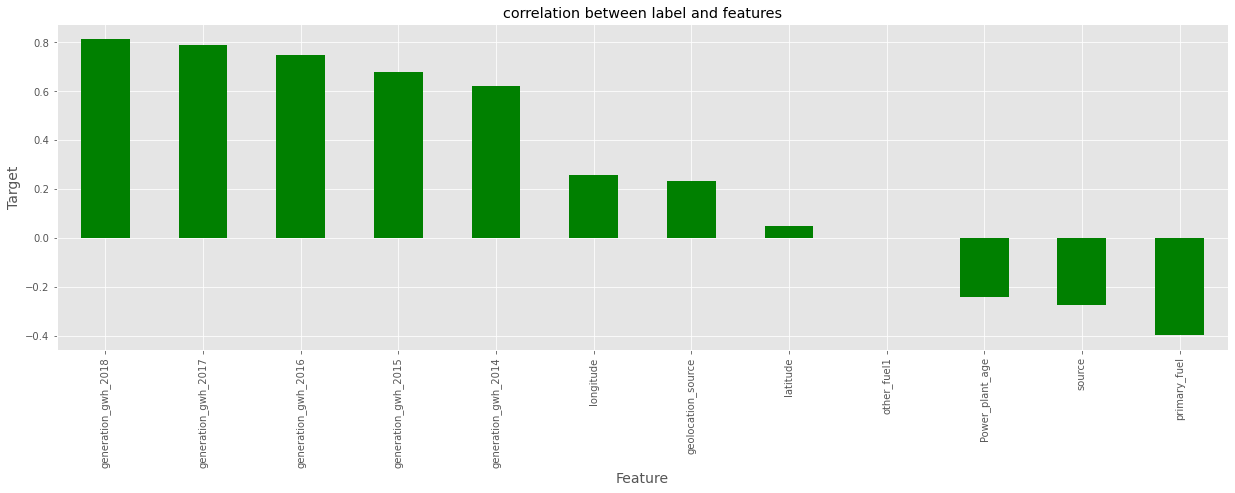

In [78]:
#cheking relarion between two variables
plt.figure(figsize=[21,6])
plt.title('correlation between label and features')
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='g')                
plt.xlabel('Feature', fontsize = 14)
plt.ylabel('Target', fontsize = 14)
plt.show()

Here we can easily observe the positive and negative relation between label and features

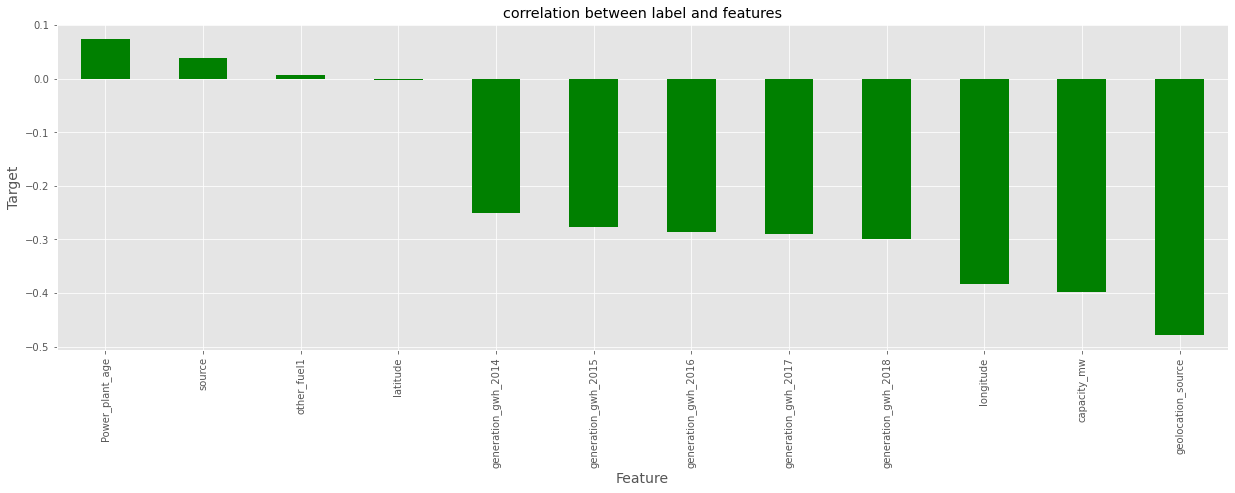

In [79]:
#cheking relarion between two variables
plt.figure(figsize=[21,6])
plt.title('correlation between label and features')
new_df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='g')                
plt.xlabel('Feature', fontsize = 14)
plt.ylabel('Target', fontsize = 14)
plt.show()

Here we can easily observe the positive and negative relation between label and features

from both barplot we can see that column latitude and otherfuel1 has very less corelation with target variable so we will drop them.

In [80]:
new_df.drop("other_fuel1", axis=1, inplace=True)
new_df.drop("latitude", axis=1, inplace=True)

In [81]:
new_df.head()

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,73.2407,6,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,74.6090,1,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,69.3732,7,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


# Prediction for capacity_mw

In [82]:
# Seprating the Dependent and Independent variables
x = new_df.drop("capacity_mw",axis=1)
y = new_df["capacity_mw"]

In [83]:
x.shape

(851, 10)

In [84]:
y.shape

(851,)

# Cheking for the skewness

In [85]:
x.skew()

longitude              0.945877
primary_fuel           0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

Columns which have skewness are 'longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age'

also column source and geolocation_source also have skewness but thet are categorical so no need to remove skewness

# removing skewness using yeo-johnson method

In [86]:
skewd_features = ['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']

In [87]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')
'''
parameters:
    method= 'box-cox'or 'yeo-johnson'
''' 

"\nparameters:\n    method= 'box-cox'or 'yeo-johnson'\n"

In [88]:
x[skewd_features]= scaler.fit_transform(new_df[skewd_features].values)
x[skewd_features].head()

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,-0.499829,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-2.377759,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,2.430594,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.261979,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384


In [89]:
#now lets check skewness after using transformation
x.skew()

longitude             -0.000128
primary_fuel           0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.043734
dtype: float64

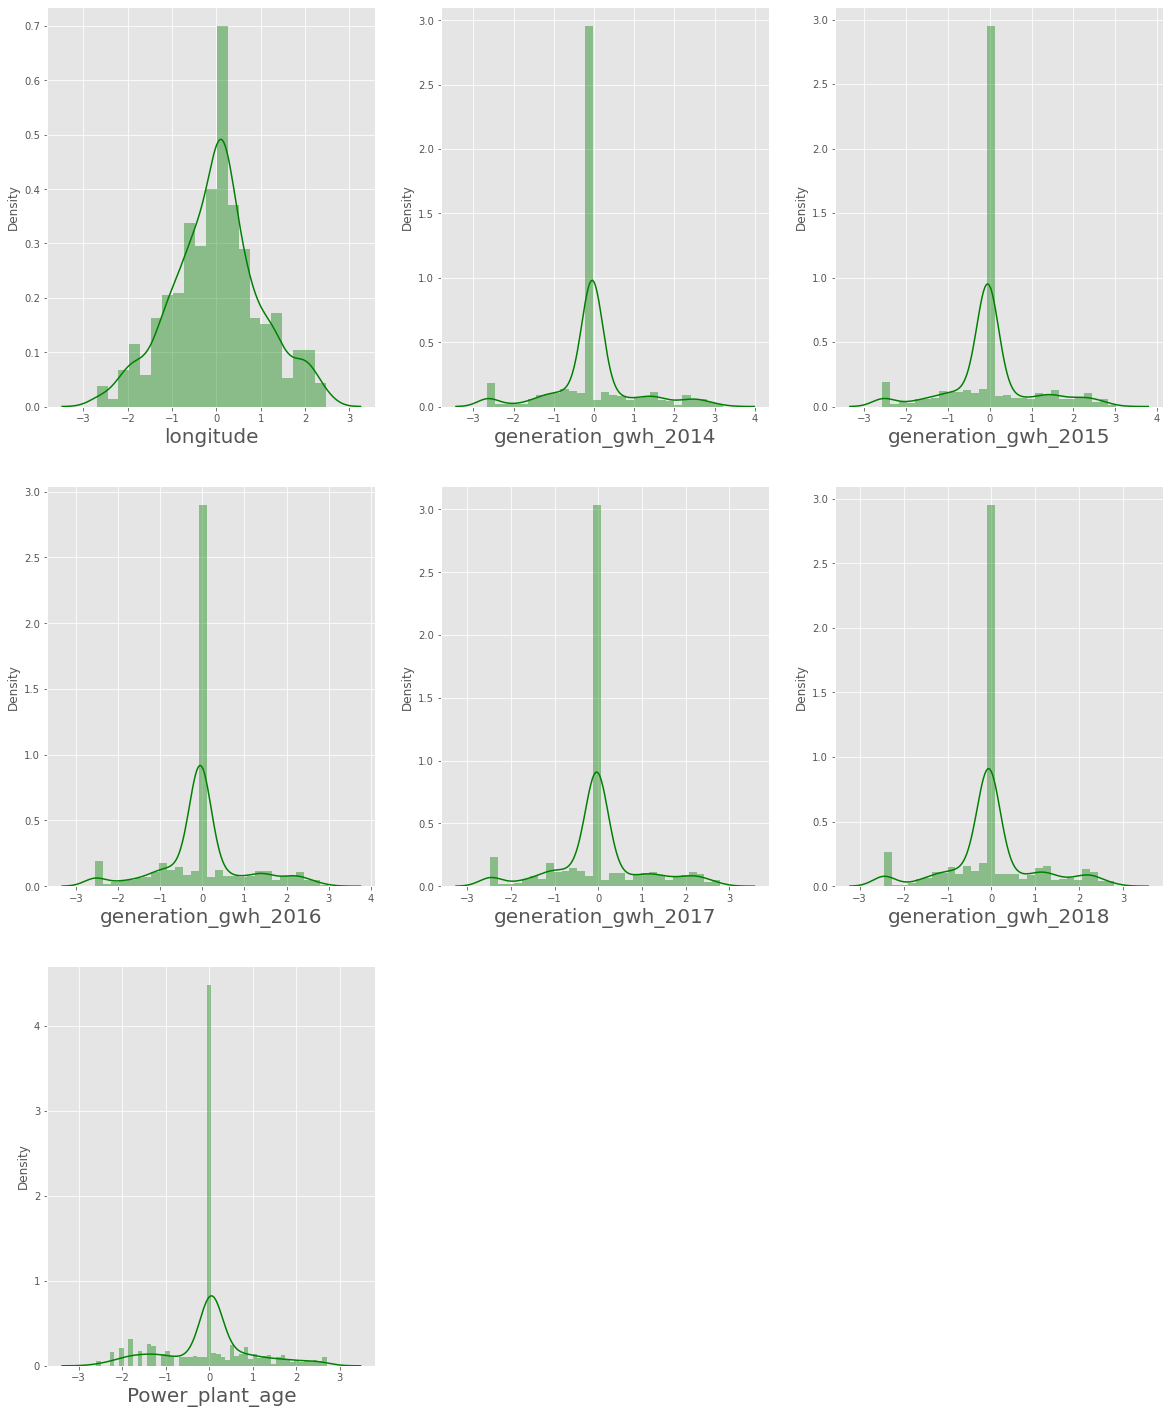

In [90]:
plt.figure(figsize=(20,25), facecolor ='white')
plotnumber = 1
for column in x[skewd_features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,1.175506,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,-0.499829,-0.975797,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-2.377759,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,2.430594,-0.545536,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.261979,-0.975797,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384
...,...,...,...,...,...,...,...,...,...,...
846,0.231932,-0.975797,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.980960
847,0.421592,1.175506,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
848,-0.224400,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
849,-0.760624,-0.975797,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187


In [92]:
#finding varience inflation factor in each scaled column 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x.values,i)
                     for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

             

,VIF values,Features
0,1.309948,longitude
1,1.682645,primary_fuel
2,1.503721,source
3,1.875750,geolocation_source
4,3.603333,generation_gwh_2014
5,6.182235,generation_gwh_2015
6,9.957776,generation_gwh_2016
7,9.750143,generation_gwh_2017
8,8.951489,generation_gwh_2018
9,1.102659,Power_plant_age


we can see th vif values are less than 10 i.e we are free from multicollinearity problem

# Modelling

Finding best random state

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [94]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu,"on Random_state ",maxRS)

Maximum r2 score is  0.8569592193400313 on Random_state  110


we are getting max r2 score 87% on random state 185

In [95]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=maxRS)

# Regression Algorithm

In [96]:
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn .neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import metrics 

In [97]:
#checking r2 score for RandomForestRegressor 
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
 
#prediction
predRFR = RFR.predict(x_test)
print('R2_score:',r2_score(y_test,predRFR))

#MAE
print('MAE:',metrics.mean_absolute_error(y_test,predRFR))

#MSE
print('MSE:',metrics.mean_squared_error(y_test,predRFR))

#RMSE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predRFR)))



R2_score: 0.8564443905033751
MAE: 95.43791132927237
MSE: 31243.259081639535
RMSE: 176.75762807200016


The r2 score for randomforestclassifie is 86%

In [98]:
#checking r2 score for DecisionTreeRegressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)
 
#prediction
predDTR = DTR.predict(x_test)
print('R2_score:',r2_score(y_test,predDTR))

#MAE
print('MAE:',metrics.mean_absolute_error(y_test,predDTR))

#MSE
print('MSE:',metrics.mean_squared_error(y_test,predDTR))

#RMSE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predDTR)))



R2_score: 0.6745043680169276
MAE: 131.2565078125
MSE: 70840.45266951562
RMSE: 266.1586982788946


The r2 score for randomforestclassifie is 66%

In [99]:
#checking r2 score for KNN
knn = KNN()
knn.fit(x_train,y_train)
 
#prediction
predknn = knn.predict(x_test)
print('R2_score:',r2_score(y_test,predknn))

#MAE
print('MAE:',metrics.mean_absolute_error(y_test,predknn))

#MSE
print('MSE:',metrics.mean_squared_error(y_test,predknn))

#RMSE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predknn)))



R2_score: 0.7805779139892441
MAE: 115.60134062499999
MSE: 47754.741911558755
RMSE: 218.5285837403399


The r2 score for randomforestclassifie is 79%

In [100]:
#checking r2 score for GradientBoostingRegressor
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)
 
#prediction
predGB = GB.predict(x_test)
print('R2_score:',r2_score(y_test,predGB))

#MAE
print('MAE:',metrics.mean_absolute_error(y_test,predGB))

#MSE
print('MSE:',metrics.mean_squared_error(y_test,predGB))

#RMSE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predGB)))


R2_score: 0.8358830025805131
MAE: 107.40526573579665
MSE: 35718.21322801287
RMSE: 188.99262744354044


The r2 score for randomforestclassifie is 85%

In [101]:
#checking r2 score for BaggingRegressor
BR = BaggingRegressor()
BR.fit(x_train,y_train)
 
#prediction
predBR = BR.predict(x_test)
print('R2_score:',r2_score(y_test,predBR))

#MAE
print('MAE:',metrics.mean_absolute_error(y_test,predBR))

#MSE
print('MSE:',metrics.mean_squared_error(y_test,predBR))

#RMSE
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predBR)))


R2_score: 0.8205260388281055
MAE: 106.46982274418289
MSE: 39060.48316024493
RMSE: 197.63725144882207


The r2 score for randomforestclassifie is 83%

# Cheking the cross validation score

In [102]:
from sklearn.model_selection import cross_val_score

In [103]:
#cheking cv score for RFR
print(cross_val_score(RFR,x,y,cv=5).mean())

0.7782280956484202


In [104]:
#cheking cv score for DTR
print(cross_val_score(DTR,x,y,cv=5).mean())

0.5794472269269029


In [105]:
#cheking cv score for KNN regressor
print(cross_val_score(knn,x,y,cv=5).mean())

0.7246064724376091


In [106]:
#cheking cv score for GB
print(cross_val_score(GB,x,y,cv=5).mean())

0.7514435183527592


In [107]:
#cheking cv score for BR
print(cross_val_score(BR,x,y,cv=5).mean())

0.7718813152436328


from above differnce between r2 score and cvs we can see the random forest model is best model 

# Hyperparameter tuning

In [108]:
from sklearn.model_selection import GridSearchCV

In [109]:
#RandomForestRegressor
parameters = {'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2'],
             'n_estimators':[0,200],
            'max_depth':[2,3,4,6]}

In [110]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [111]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [112]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 6,
 'max_features': 'sqrt',
 'n_estimators': 200}

In [113]:
#creating final model 
capacity = RandomForestRegressor(criterion='mse',max_depth=6,max_features='log2',n_estimators=200)
capacity.fit(x_train,y_train)
pred = capacity.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test,predRFR)))

R2_Score: 85.64443905033751
RMSE value: 176.75762807200016


After tuning the model the r2 score is 86%

# Saving the model

In [114]:
#saving the model using pkl
import joblib
joblib.dump(capacity,"Globalpowerplant_capacity.pkl")

['Globalpowerplant_capacity.pkl']

# Prediction of primary_fuel

Separating the features and labels variable

In [115]:
x_df = new_df.drop("primary_fuel",axis=1)
y_df = new_df["primary_fuel"]

In [116]:
x_df.shape

(851, 10)

In [117]:
y_df.shape

(851,)

In [118]:
x_df.head()

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,73.2407,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,7.0
1,98.0,74.6090,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
2,39.2,69.3732,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,17.0
3,135.0,91.3602,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,14.0
4,1800.0,82.4091,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,3.0


# Cheking for skewness

In [119]:
x_df.skew()

capacity_mw            2.170245
longitude              0.945877
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

# removing skewness using yeo-johnson method

In [120]:
skewd_features = ['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']

In [121]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer(method='yeo-johnson')
'''
parameters:
    method= 'box-cox'or 'yeo-johnson'
''' 

"\nparameters:\n    method= 'box-cox'or 'yeo-johnson'\n"

In [122]:
x_df[skewd_features]= scaler.fit_transform(new_df[skewd_features].values)
x_df[skewd_features].head()

,capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,0.220284,-0.499829,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-0.274381,-2.377759,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,0.391670,2.430594,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.731859,1.261979,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384


In [123]:
#now lets check skewness after using transformation
x_df.skew()

capacity_mw            0.016303
longitude             -0.000128
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.043734
dtype: float64

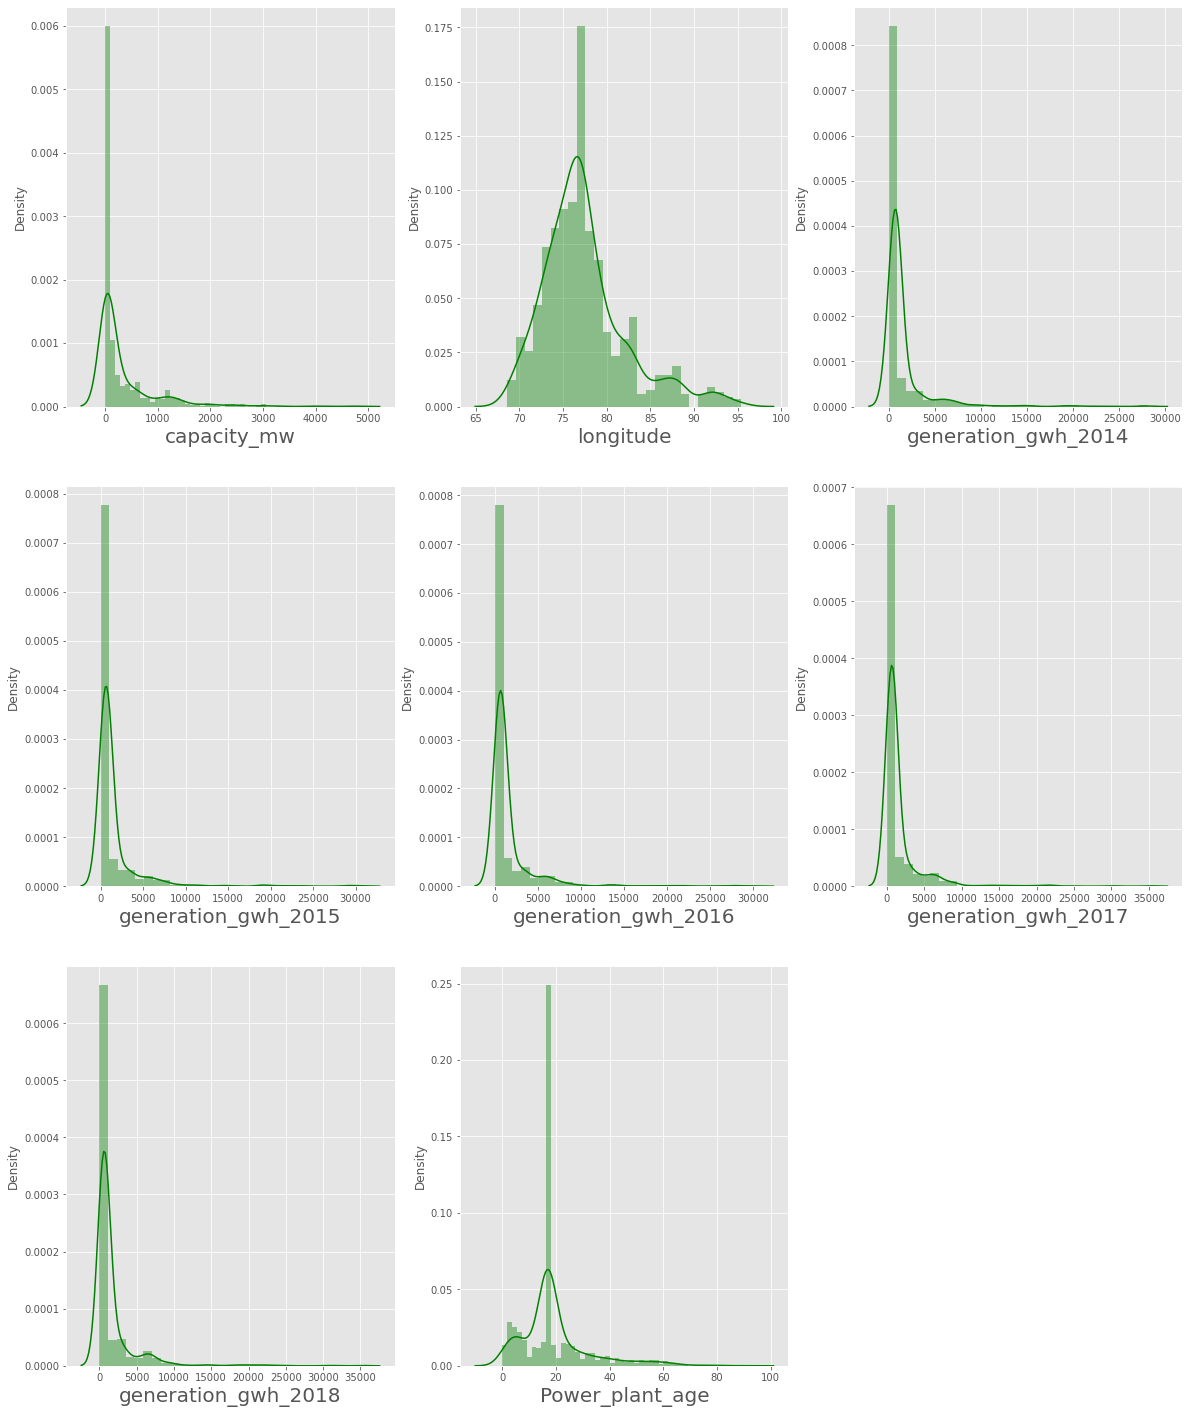

In [124]:
plt.figure(figsize=(20,25), facecolor ='white')
plotnumber = 1
for column in x_df[skewd_features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [125]:
#Standard Scalarization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_df= pd.DataFrame(scaler.fit_transform(x_df),columns=x_df.columns)
x_df

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384
...,...,...,...,...,...,...,...,...,...,...
846,1.672840,0.231932,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.980960
847,-1.598186,0.421592,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
848,-0.507278,-0.224400,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
849,0.111201,-0.760624,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187


In [126]:
#finding varience inflation factor in each scaled column 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"]= [variance_inflation_factor(x_df.values,i)
                     for i in range(len(x_df.columns))]
vif["Features"]=x_df.columns
vif


,VIF values,Features
0,1.811775,capacity_mw
1,1.193670,longitude
2,1.413037,source
3,1.590869,geolocation_source
4,3.621608,generation_gwh_2014
5,6.190754,generation_gwh_2015
6,9.961303,generation_gwh_2016
7,9.767170,generation_gwh_2017
8,8.961146,generation_gwh_2018
9,1.153813,Power_plant_age


since all vif values are less than 10 no multicolinerity is there.

In [127]:
y_df.value_counts()

1    238
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

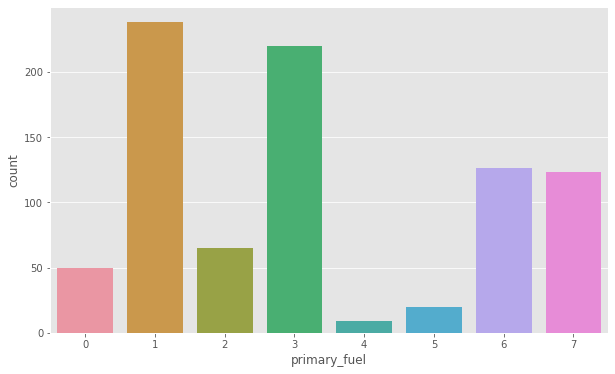

In [128]:
#visualizing the data after balancing
plt.figure(figsize=(10,6))
sns.countplot(y_df)
plt.show

In [129]:
x_df.head()

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.081421
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.046187
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.245810
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.758384


this is the dataframe after preprocessing and cleaning the data

# Modelling

Finding best random state

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [131]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()
maxAccu=0
maxRS=0
for i in range(1,200):
    x_df_train,x_df_test,y_df_train,y_df_test = train_test_split(x_df,y_df,test_size=.30, random_state=i)
    mod = DecisionTreeClassifier()
    DTC.fit(x_df_train,y_df_train)
    pred = DTC.predict(x_df_test)
    acc=accuracy_score(y_df_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"on Random_state ",maxRS)

Best accuracy is  0.8359375 on Random_state  167


In [132]:
x_df_train,x_df_test,y_df_train,y_df_test = train_test_split(x_df,y_df,test_size=.30,random_state=maxRS)

We have created a new train test split using random state

In [133]:
from sklearn.metrics import confusion_matrix
# checking accuracy for decision tree classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_df_train,y_df_train)

# prediction
predDTC = DTC.predict(x_df_test)

print(accuracy_score(y_df_test, predDTC))
print(confusion_matrix(y_df_test, predDTC))
print(classification_report(y_df_test, predDTC))

0.828125
[[10  5  0  0  0  0  0  0]
 [ 1 54  4  7  4  0  0  1]
 [ 1  6  6  1  0  0  0  0]
 [ 0  5  2 66  0  1  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  2  1  0  0  3  0  0]
 [ 1  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 32]]
              precision    recall  f1-score   support

           0       0.77      0.67      0.71        15
           1       0.73      0.76      0.74        71
           2       0.46      0.43      0.44        14
           3       0.89      0.89      0.89        74
           4       0.00      0.00      0.00         2
           5       0.75      0.50      0.60         6
           6       1.00      0.98      0.99        42
           7       0.97      1.00      0.98        32

    accuracy                           0.83       256
   macro avg       0.70      0.65      0.67       256
weighted avg       0.83      0.83      0.83       256



# Descion tree classifier

In [134]:
DTC = DecisionTreeClassifier()
DTC.fit(x_df_train,y_df_train)

#prediction
PredDTC = DTC.predict(x_df_test)
print(accuracy_score(y_df_test, predDTC))
print(confusion_matrix(y_df_test, predDTC))
print(classification_report(y_df_test, predDTC))

0.828125
[[10  5  0  0  0  0  0  0]
 [ 1 54  4  7  4  0  0  1]
 [ 1  6  6  1  0  0  0  0]
 [ 0  5  2 66  0  1  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  2  1  0  0  3  0  0]
 [ 1  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 32]]
              precision    recall  f1-score   support

           0       0.77      0.67      0.71        15
           1       0.73      0.76      0.74        71
           2       0.46      0.43      0.44        14
           3       0.89      0.89      0.89        74
           4       0.00      0.00      0.00         2
           5       0.75      0.50      0.60         6
           6       1.00      0.98      0.99        42
           7       0.97      1.00      0.98        32

    accuracy                           0.83       256
   macro avg       0.70      0.65      0.67       256
weighted avg       0.83      0.83      0.83       256



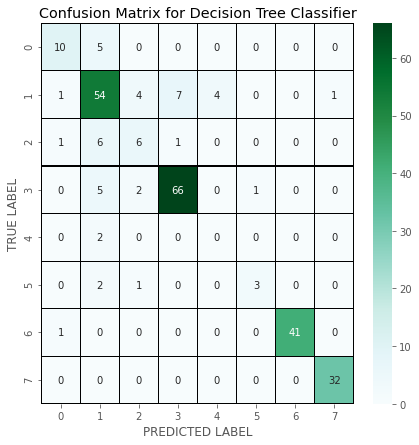

In [135]:
#lets plot confusion matrix for DTC
cm = confusion_matrix(y_df_test , predDTC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black" , fmt = ".0f" , ax=ax, cmap="BuGn" , xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()

In [136]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_df_train,y_df_train)

#prediction
PredRFC = RFC.predict(x_df_test)
print(accuracy_score(y_df_test, PredRFC))
print(confusion_matrix(y_df_test, PredRFC))
print(classification_report(y_df_test, PredRFC))

0.8359375
[[ 9  6  0  0  0  0  0  0]
 [ 0 59  3  6  0  1  0  2]
 [ 1  5  4  4  0  0  0  0]
 [ 0  8  0 66  0  0  0  0]
 [ 0  1  1  0  0  0  0  0]
 [ 0  2  1  0  0  3  0  0]
 [ 1  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 32]]
              precision    recall  f1-score   support

           0       0.82      0.60      0.69        15
           1       0.73      0.83      0.78        71
           2       0.44      0.29      0.35        14
           3       0.87      0.89      0.88        74
           4       0.00      0.00      0.00         2
           5       0.75      0.50      0.60         6
           6       1.00      0.98      0.99        42
           7       0.94      1.00      0.97        32

    accuracy                           0.84       256
   macro avg       0.69      0.64      0.66       256
weighted avg       0.82      0.84      0.83       256



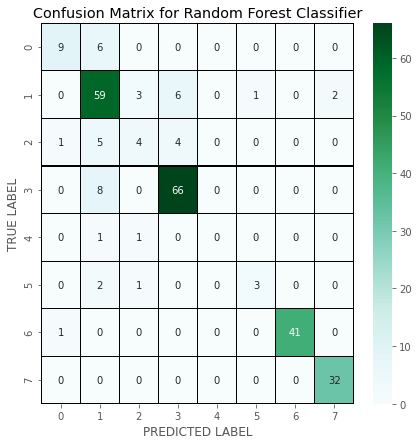

In [137]:
#lets plot confusion matrix for DTC
cm = confusion_matrix(y_df_test , PredRFC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black" , fmt = ".0f" , ax=ax, cmap="BuGn" , xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

In [138]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_df_train,y_df_train)

#prediction
Predsvc = svc.predict(x_df_test)
print(accuracy_score(y_df_test, Predsvc))
print(confusion_matrix(y_df_test, Predsvc))
print(classification_report(y_df_test, Predsvc))

0.72265625
[[ 6  4  0  0  0  0  0  5]
 [ 5 56  2  4  0  0  0  4]
 [ 1  6  2  4  0  0  0  1]
 [ 0 17  0 49  0  0  0  8]
 [ 0  2  0  0  0  0  0  0]
 [ 0  4  1  1  0  0  0  0]
 [ 0  2  0  0  0  0 40  0]
 [ 0  0  0  0  0  0  0 32]]
              precision    recall  f1-score   support

           0       0.50      0.40      0.44        15
           1       0.62      0.79      0.69        71
           2       0.40      0.14      0.21        14
           3       0.84      0.66      0.74        74
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         6
           6       1.00      0.95      0.98        42
           7       0.64      1.00      0.78        32

    accuracy                           0.72       256
   macro avg       0.50      0.49      0.48       256
weighted avg       0.71      0.72      0.70       256



In [139]:
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier

GB = GradientBoostingClassifier()
GB.fit(x_df_train,y_df_train)

#prediction
PredGB = GB.predict(x_df_test)
print(accuracy_score(y_df_test, PredGB))
print(confusion_matrix(y_df_test, PredGB))
print(classification_report(y_df_test, PredGB))

0.828125
[[ 6  9  0  0  0  0  0  0]
 [ 1 60  2  6  0  1  0  1]
 [ 1  6  5  2  0  0  0  0]
 [ 0  7  1 66  0  0  0  0]
 [ 0  1  1  0  0  0  0  0]
 [ 0  2  2  0  1  1  0  0]
 [ 0  0  0  0  0  0 42  0]
 [ 0  0  0  0  0  0  0 32]]
              precision    recall  f1-score   support

           0       0.75      0.40      0.52        15
           1       0.71      0.85      0.77        71
           2       0.45      0.36      0.40        14
           3       0.89      0.89      0.89        74
           4       0.00      0.00      0.00         2
           5       0.50      0.17      0.25         6
           6       1.00      1.00      1.00        42
           7       0.97      1.00      0.98        32

    accuracy                           0.83       256
   macro avg       0.66      0.58      0.60       256
weighted avg       0.82      0.83      0.82       256



In [140]:
BC = BaggingClassifier()
BC.fit(x_df_train,y_df_train)

#prediction
PredBC = BC.predict(x_df_test)
print(accuracy_score(y_df_test, PredBC))
print(confusion_matrix(y_df_test, PredBC))
print(classification_report(y_df_test, PredBC))

0.828125
[[10  5  0  0  0  0  0  0]
 [ 0 60  3  6  1  0  0  1]
 [ 1  6  4  3  0  0  0  0]
 [ 0  9  3 62  0  0  0  0]
 [ 0  1  1  0  0  0  0  0]
 [ 0  2  1  0  0  3  0  0]
 [ 1  0  0  0  0  0 41  0]
 [ 0  0  0  0  0  0  0 32]]
              precision    recall  f1-score   support

           0       0.83      0.67      0.74        15
           1       0.72      0.85      0.78        71
           2       0.33      0.29      0.31        14
           3       0.87      0.84      0.86        74
           4       0.00      0.00      0.00         2
           5       1.00      0.50      0.67         6
           6       1.00      0.98      0.99        42
           7       0.97      1.00      0.98        32

    accuracy                           0.83       256
   macro avg       0.72      0.64      0.67       256
weighted avg       0.83      0.83      0.82       256



# Checking Cross validation score

In [141]:
from sklearn.model_selection import cross_val_score

In [142]:
#cvs for DTC
print(cross_val_score(DTC , x_df,y_df,cv=5).mean())

0.7908496732026143


In [143]:
#cvs for RFC
print(cross_val_score(RFC , x_df,y_df,cv=5).mean())

0.8167113863089096


In [144]:
#cvs for SVC
print(cross_val_score(svc , x_df,y_df,cv=5).mean())

0.727389060887513


In [145]:
#cvs for GB
print(cross_val_score(GB , x_df,y_df,cv=5).mean())

0.8249398004815962


In [146]:
#cvs for BC
print(cross_val_score(BC , x_df,y_df,cv=5).mean())

0.8131682146542827


from above result we can say that Gradient boosting classifier is best fitting model


# Hyperparameter tuning

In [147]:
from sklearn.model_selection import GridSearchCV

In [148]:
parameters = {'criterion':['friedman_mse','mse','mae'],
             'max_features':['auto','sqrt','log2'],
             'n_estimators':[0,200],
            'max_depth':[0,200]}


In [149]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [150]:
GCV.fit(x_df_train,y_df_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'criterion': ['friedman_mse', 'mse', 'mae'],
                         'max_depth': [0, 200],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [151]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 200,
 'max_features': 'log2',
 'n_estimators': 200}

In [153]:
#creating final model 
Primary_fuel = GradientBoostingClassifier(criterion='friedman_mse',max_depth=8, max_features='log2',n_estimators=200)
Primary_fuel.fit(x_df_train,y_df_train)
pred = Primary_fuel.predict(x_df_test)
acc=accuracy_score(y_df_test,pred)
print(acc*100)

84.765625


Plotting roc and comparing auc for the final model

In [175]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

classifier = OneVsRestClassifier(Primary_fuel)
y_score = classifier.fit(x_df_train,y_df_train).predict_proba(x_df_test)
#binarize the output
y_df_test_bin = label_binarize(y_df_test , classes=[0,1,2,3,4,5,6,7] )
n_classes = 8


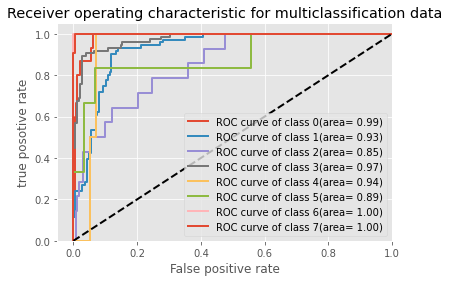

In [178]:
#compute Roc curve and auc for all the classes
false_positive_rate = dict()
true_positive_rate = dict()
roc_auc = dict()
for i in range(n_classes):
    false_positive_rate[i],true_positive_rate[i],_=roc_curve(y_df_test_bin[:,i],y_score[:,i])
    roc_auc[i]= auc(false_positive_rate[i],true_positive_rate[i])
   
    
for i in range (n_classes):
    plt.plot(false_positive_rate[i],true_positive_rate[i], lw=2, label='ROC curve of class {0}(area= {1:0.2f})'''.format(i,roc_auc[i]))
plt.plot([0,1],[0,1],'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('true posotive rate')
plt.title('Receiver operating characteristic for multiclassification data')
plt.legend(loc='lower right')

# Saving the model

In [180]:
import joblib 
joblib.dump(Primary_fuel,"globel_power_plant_Primary_fuel.pkl")

['globel_power_plant_Primary_fuel.pkl']